Let's start by loading the customer data. It's important to take a look at this data to understand what we're working with. Let's check it out.



In [1]:
import pandas as pd

data = pd.read_csv( 'customer_data.csv')
data.head()


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


After loading the customer data successfully, it's time to figure out how recent each customer made a purchase. This tells us how recently each customer interacted with our business. Let's crunch the numbers and see!

In [2]:
from datetime import datetime
# --- WRITE YOUR CODE FOR  TASK 2 ---
data['PurchaseDate']=pd.to_datetime(data['PurchaseDate'])

In [3]:
max_date=data.loc[data['PurchaseDate'].idxmax()]['PurchaseDate']
data['Recency']=(max_date-data['PurchaseDate']).dt.days

In [4]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60
1,2188,2023-04-11,463.70,Product A,176819,London,60
2,4608,2023-04-11,80.28,Product A,340062,New York,60
3,2559,2023-04-11,221.29,Product A,239145,London,60
4,9482,2023-04-11,739.56,Product A,194545,Paris,60


Now that we know how recent each customer made a purchase, let's find out how often they buy from us. This will help us understand how frequently each customer interacts with our business. Let's dive in and find out!

In [5]:
order_counts = data.groupby('CustomerID')["OrderID"].count().reset_index()
order_counts.rename({"OrderID":"Frequency"},inplace=True)

In [6]:
order_counts.head()

,CustomerID,OrderID
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1


In [7]:
data=pd.merge(data,order_counts,on='CustomerID',how='left')
data.rename({'OrderID_x':"OrderID",'OrderID_y':"Frequency"},axis='columns',inplace=True)

In [8]:
data.columns

Index(['CustomerID', 'PurchaseDate', 'TransactionAmount', 'ProductInformation',
       'OrderID', 'Location', 'Recency', 'Frequency'],
      dtype='object')

Following our success in understanding recency and frequency, let's now determine the monetary value of each customer. This will give us insights into how much each customer spends with our business. Let's proceed and uncover this valuable information!

In [9]:
transaction=data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
transaction.rename({"TransactionAmount":"MonetryValue"},inplace=True,axis='columns')
data=pd.merge(data,transaction,on='CustomerID',how='left')
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56


so far, let's define scoring criteria for each RFM value. We'll create bins for recency, frequency, and monetary value, and assign scores based on these bins. For recency, a higher score indicates a more recent purchase, while for frequency and monetary value, higher scores represent higher engagement and spending. Let's calculate the RFM scores and add them to our dataset. This will help us segment customers based on their behavior. Let's continue and score our RFM values!

In [10]:
recency_bins = [-1, 30, 60, 90, 180, float('inf')]
recency_labels = [5, 4, 3, 2, 1]

# Define bins and labels for Frequency
frequency_bins = [0, 1, 2, 3, 4, float('inf')]
frequency_labels = [1, 2, 3, 4, 5]

# Define bins and labels for MonetaryValue
monetary_bins = [0, 100, 200, 300, 400, float('inf')]
monetary_labels = [1, 2, 3, 4, 5]

data['RecencyScore'] = pd.cut(data['Recency'], bins=recency_bins, labels=recency_labels)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=frequency_bins, labels=frequency_labels)
data['MonetaryScore'] = pd.cut(data['MonetryValue'], bins=monetary_bins, labels=monetary_labels)


 After assigning scores to recency, frequency, and monetary values, let's convert these scores into integers. Then, we'll calculate the overall RFM score by adding up the individual scores. This final score gives us a comprehensive view of each customer's engagement with our business. Let's complete this last step and finalize our RFM analysis!

In [11]:
data['RecencyScore']=data['RecencyScore'].astype(int)
data['FrequencyScore']=data['FrequencyScore'].astype(int)
data['MonetaryScore']=data['MonetaryScore'].astype(int)

In [12]:
data.dtypes

CustomerID                     int64
PurchaseDate          datetime64[ns]
TransactionAmount            float64
ProductInformation            object
OrderID                        int64
Location                      object
Recency                        int64
Frequency                      int64
MonetryValue                 float64
RecencyScore                   int64
FrequencyScore                 int64
MonetaryScore                  int64
dtype: object

In [13]:
data['RFM_Score']=data['MonetaryScore']+data['RecencyScore']+data['FrequencyScore']

 Now, let's segment our customers based on their RFM scores. We'll divide them into three groups: low-value, mid-value, and high-value. By grouping customers this way, we can better understand their importance to our business and tailor our strategies accordingly. Let's create these segments and see how our customers are distributed across them!

In [14]:
# --- WRITE YOUR CODE FOR  TASK 7 ---
def assign_segment(score):
    if score >= 7:
        return 'High-Value'
    elif score <= 3:
        return 'Low-Value'
    else:
        return 'Mid-Value'

# Apply the segment assignment function to create a new 'Value Segment' column
data['Value Segment'] = data['RFM_Score'].apply(assign_segment)
#--- Inspect data ---

 Now, let's visualize the distribution of customers across the RFM segments. We'll create a count plot to show how many customers fall into each segment: low-value, mid-value, and high-value. This visualization helps us understand the composition of our customer base and identify areas for improvement. Let's plot it and see the results!

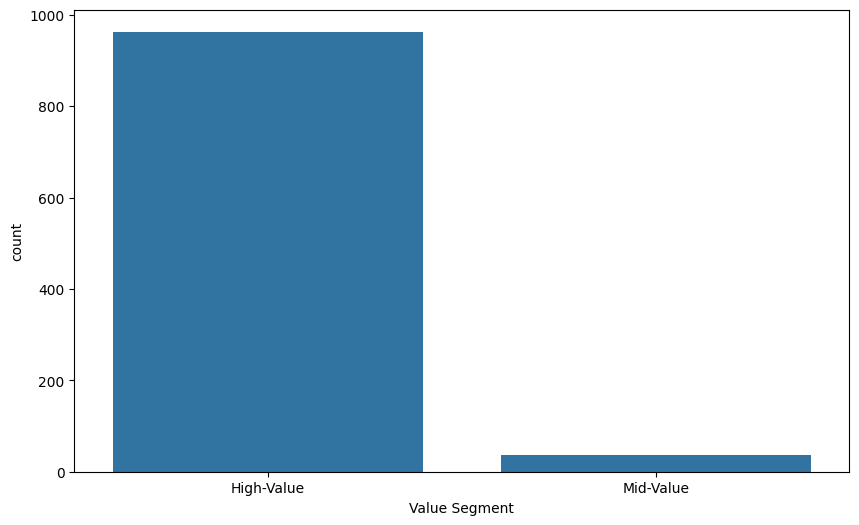

In [15]:
import seaborn as sns, matplotlib.pyplot as plt
# --- WRITE YOUR CODE FOR  TASK 8 ---
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Value Segment')
plt.show()